In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('Dataset/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


# Deskripsi Variabel

Berdasarkan informasi dari dataset tersebut hasil pertandingan bola dri tahun 1872-2022 (hingga piala dunia berlangsung) sebagai berikut :
1. date	: tangggal berlangsungnya pertandingan
2. home_team	: team tuan rumah yang bermain
3. away_team	: team tandang yang bermai
4. home_score	: skor team rumah
5. away_score	: skor team tandang
6. tournament	: nama turnamen/kompetisi yang tercatat oleh FIFA
7. city	: kota tempat match berlangsung
8. country	: negara tempat match berlangsung
9. neutral : tempat match berlangsung bersifat netral(bukan tuan rumah)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,44202.0,1.739107,1.746388,0.0,1.0,1.0,2.0,31.0
away_score,44202.0,1.178069,1.394215,0.0,0.0,1.0,2.0,21.0


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count adalah jumlah sample pada data.
* Mean adalah nilai rata-rata
* Std adalah standar deviasi
* Min yaitu nilai minimum setiap kolom
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44206 non-null  object 
 1   home_team   44206 non-null  object 
 2   away_team   44206 non-null  object 
 3   home_score  44202 non-null  float64
 4   away_score  44202 non-null  float64
 5   tournament  44206 non-null  object 
 6   city        44206 non-null  object 
 7   country     44206 non-null  object 
 8   neutral     44206 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


Berdasarkan informasi dari dataset tersebut hasil pertandingan bola dri tahun 1872-2022 (hingga piala dunia berlangsung) sebagai berikut :
1. date	: berisi tanggal dan bersifat object (non-int)
2. home_team	: berisi nama tim yang menjadi tuan rumah (negara)
3. away_team	: berisi nama tim yang menjadi tandang (negara)
4. home_score	: skor bersifat float (1.0 , 2.0 , 3.0 dst)
5. away_score	: skor bersifat float (1.0 , 2.0 , 3.0 dst)
6. tournament	:  berisi nama turnamen/kompetisi yang tercatat oleh FIFA
7. city	:  berisi nama kota tempat match berlangsung
8. country	: berisi nama negara tempat match berlangsung
9. neutral : berisi sifat (False/True)

In [4]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    4
away_score    4
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
print(df[df['home_score'].isnull()])

             date    home_team    away_team  home_score  away_score  \
44202  2022-12-02       Serbia  Switzerland         NaN         NaN   
44203  2022-12-02     Cameroon       Brazil         NaN         NaN   
44204  2022-12-02        Ghana      Uruguay         NaN         NaN   
44205  2022-12-02  South Korea     Portugal         NaN         NaN   

           tournament       city country  neutral  
44202  FIFA World Cup       Doha   Qatar     True  
44203  FIFA World Cup     Lusail   Qatar     True  
44204  FIFA World Cup  Al Wakrah   Qatar     True  
44205  FIFA World Cup  Al Rayyan   Qatar     True  


Berdasarkan EDA menunjukan bahwa masih ada data yang bersifat NaN ditunjukkan pada tournament yang berlangsung (FIFA World Cup) maka dihilangkan saja 4 data tersebut

In [6]:
df=df.dropna()
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

<AxesSubplot:>

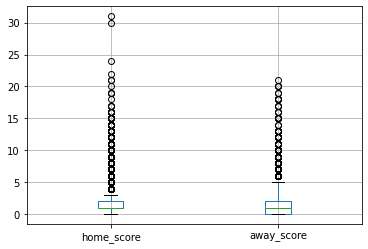

In [9]:
df.boxplot(column=['home_score','away_score'])

Target analisis ini adalah menggunakan home dan away score mulai dari tahun 1872-2022 dan terlihat masih banyak outlier yang terdapat pada box plot diduga sepakbola sebelum jaman modern menghasilkan score diatas 5 dan untuk skor tuan rumah tertinggi mencapai 30 dan akan dinormaliasiskan saja dengan mencari skor dibawah 15 gol (asumsi pribadi)

In [10]:
higher_home=15
higher_away=15
df=df[(df["home_score"]<higher_home) & (df["away_score"]<higher_away)]
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
conditions  = [df["home_score"] == df["away_score"], 
               df["home_score"] > df["away_score"] , 
               df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Keterangan"] = np.select(conditions, choices)
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Keterangan
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Lost
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Lost
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False,Win
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False,Win


Kemudian, dengan berdasarkan score bisa kita klasifikasikan antara status kemenangan setiap match bergunan untuk kedepannya

In [12]:
countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 309 Countries in the home_team Column

Countries-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Paraguay' 'Japan' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghan

Berdasarkan data tersebut, menunjukan negara yang tercata sebanyak 309 negara yang terlibat dan ada beberapa negara yang sudah tidak ada seperti German Dr ketika German barat dan German timur masih bertikai

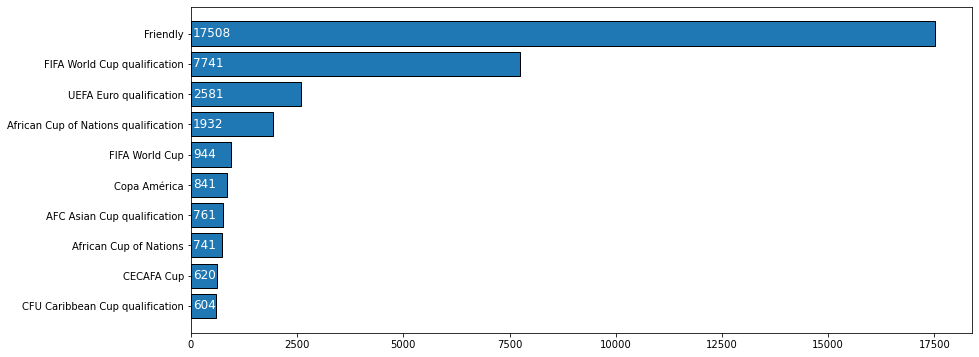

In [13]:
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

Berdasarkan data tersebut, pertandingan  persahabatan mendominasi berdasarkan aturan FIFA dalam pemeringkatan negara bahwa pertangdingan persahabatan faktor pengali lebih kecil dibandingkan dengan major tournament dengan merujuk pada [ini](https://id.wikipedia.org/wiki/Peringkat_Dunia_FIFA)

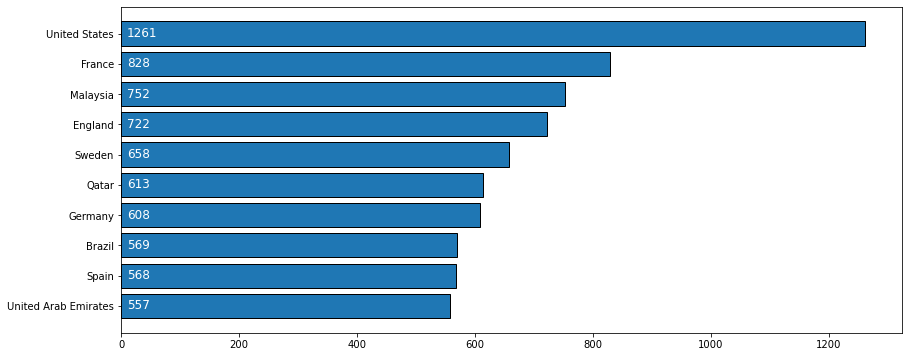

In [14]:
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

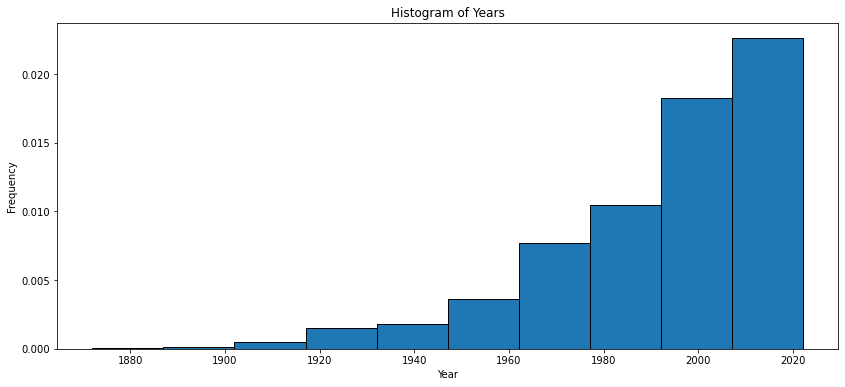

In [15]:
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=10, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

Setelah tahun 1960, frekuensi pertandingan meningkat tajam dikarenakan beberapa negara yang termasuk dalam region ataupun lainnya mengadakan turnamen skala major jadi berdampak tajam untuk pertandingan tersebut.

In [16]:
data_home=df.loc[df["home_team"]==df["country"] ]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Keterangan
29,1884-01-26,Northern Ireland,Scotland,0.0,5.0,British Home Championship,Belfast,Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6.0,0.0,British Home Championship,Wrexham,Wales,False,Win
31,1884-02-23,Northern Ireland,England,1.0,8.0,British Home Championship,Belfast,Ireland,False,Lost
32,1884-03-15,Scotland,England,1.0,0.0,British Home Championship,Glasgow,Scotland,False,Win
33,1884-03-17,Wales,England,0.0,4.0,British Home Championship,Wrexham,Wales,False,Lost
...,...,...,...,...,...,...,...,...,...,...
44197,2022-11-30,Tunisia,France,1.0,0.0,FIFA World Cup,Al Rayyan,Qatar,True,Win
44198,2022-12-01,Japan,Spain,2.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True,Win
44199,2022-12-01,Costa Rica,Germany,2.0,4.0,FIFA World Cup,Al Khor,Qatar,True,Lost
44200,2022-12-01,Croatia,Belgium,0.0,0.0,FIFA World Cup,Al Rayyan,Qatar,True,Draw


Text(0.5, 1.0, 'Home Team Winning Status')

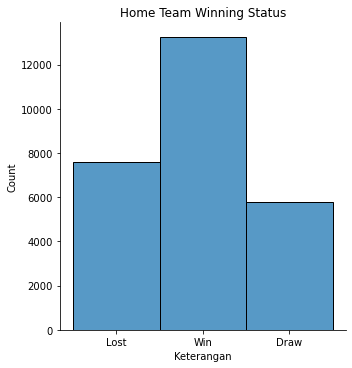

In [19]:
#Home team results
sns.displot(data_home, x="Keterangan")
plt.title("Home Team Winning Status")

Berdasarkan ini tim tuan rumah memiliki tingkat kemenangan yang lebih tinggi dibandingkan kekalahan

In [21]:
data_home['Keterangan'].value_counts()

Win     13246
Lost     7594
Draw     5803
Name: Keterangan, dtype: int64

In [23]:
teams_win_statues=pd.crosstab(df["home_team"], 
                              df["Keterangan"],
                              margins=True, 
                              margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])

#mencari total match home > 250 dengan rasio win tertinggi pada setiap negara
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>250]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20)

Keterangan,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,110,58,425,593,0.716695
Spain,71,51,257,379,0.678100
Argentina,124,69,374,567,0.659612
Egypt,69,74,260,403,0.645161
Ivory Coast,67,36,183,286,0.639860
Nigeria,69,36,184,289,0.636678
Iran,63,45,185,293,0.631399
Italy,123,52,291,466,0.624464
Germany,112,87,327,526,0.621673


In [25]:
teams_away_statues=pd.crosstab(df["away_team"], 
                               df["Keterangan"],
                               margins=True, 
                               margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])

#mencari total match away > 250 dengan rasio win tertinggi pada setiap negara
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>250]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)

teams_away_statues_100.rename(columns={'Lost': 'Win', 'Win' : 'Lost'}, 
                              index={'Win': 'Lost'}, 
                              inplace=True)
teams_away_statues_100.head(20)

Keterangan,Draw,Win,Lost,Total,team_win_probability
away_team,,,,,
Germany,94,247,119,460,0.536957
Brazil,95,228,102,425,0.536471
England,136,271,117,524,0.517176
Spain,100,169,84,353,0.478754
South Korea,115,181,109,405,0.446914
Netherlands,83,169,129,381,0.443570
Russia,118,176,113,407,0.432432
Japan,57,117,103,277,0.422383
Italy,112,154,106,372,0.413978


Membuat ML model untuk memprediksi suatu match berdasarkan data home & away score team (1872-2022)

In [26]:
df_match = df.copy()
df_match.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Keterangan
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Lost
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Lost
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False,Win
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False,Win


In [27]:
New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],
                                         df_match.values[:,1],
                                         df_match.values[:,2],
                                         df_match.values[:,3],
                                         df_match.values[:,4])),
                                columns=["year","Country","team_1",
                                         "team_2","team_1_score","team_2_score"])
#Buat dataset kedua yang berdasarkan hasil skor
New_Dataset_part_2=pd.DataFrame(list(zip(years,
                                         df_match.values[:,7],df_match.values[:,2],
                                         df_match.values[:,1],df_match.values[:,4],
                                         df_match.values[:,3])),
                                columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,2001,Rwanda,Ethiopia,Kenya,2.0,1.0
1,1953,Haiti,Haiti,Jamaica,4.0,1.0
2,1993,Japan,Sri Lanka,Thailand,0.0,1.0
3,2013,Moldova,Moldova,Montenegro,0.0,1.0
4,1960,Switzerland,Chile,Switzerland,2.0,4.0


In [28]:
teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

350

,year,team_1_score,team_2_score
year,1.00000,-0.126340,-0.126340
team_1_score,-0.12634,1.000000,-0.161794
team_2_score,-0.12634,-0.161794,1.000000


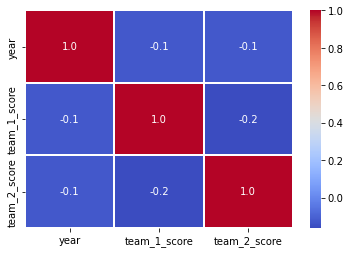

In [31]:
sns.heatmap(New_Dataset.corr(),cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
New_Dataset.corr()

Melihat korelasi dari heatmap menunjukan korelasi sedikit kuat untuk dipertimbangkan target output berdasakrn skor home (team 1) dengan away (team 2)

# Membuat model ML

# Preprocessing dengan melabeli dataset

In [46]:
# Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")

In [35]:
#Input Fatures to the model (x)

categorized_data.head(5)

,year,Country,team_1,team_2
0,2001,155,98,155
1,1953,149,131,149
2,1993,302,286,302
3,2013,197,194,197
4,1960,291,65,291


In [36]:
len(categorized_data)

88302

In [37]:
#Targets to the model (Y)

Y.head(5)

,team_1_score,team_2_score
0,2.0,1.0
1,4.0,1.0
2,0.0,1.0
3,0.0,1.0
4,2.0,4.0


In [38]:
len(Y)

88302

In [39]:
print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88302 entries, 0 to 88301
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     88302 non-null  int64   
 1   Country  88302 non-null  category
 2   team_1   88302 non-null  category
 3   team_2   88302 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88302 entries, 0 to 88301
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   team_1_score  88302 non-null  float64
 1   team_2_score  88302 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB
None


Membagi dataset dengan train test split untuk melihat algoritma ML yang mana cocok nantinya untuk digunakan 

In [47]:
X=categorized_data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8,random_state = 123)

In [41]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
from sklearn.metrics import mean_squared_error
list_mse = []
for k in range(1, 21):
  model_knn = MultiOutputRegressor(KNeighborsClassifier(n_neighbors=k)).fit(X_train, y_train)
  test_mse = mean_squared_error(y_test, model_knn.predict(X_test))
  list_mse.append(test_mse)
  print(f"Nilai MSE untuk k = {k} adalah : {test_mse}")

Nilai MSE untuk k = 1 adalah : 3.6594473699111036
Nilai MSE untuk k = 2 adalah : 3.255506483211596
Nilai MSE untuk k = 3 adalah : 3.393324273823679
Nilai MSE untuk k = 4 adalah : 3.4053281241152824
Nilai MSE untuk k = 5 adalah : 3.3268218107694922
Nilai MSE untuk k = 6 adalah : 3.3226034765868295
Nilai MSE untuk k = 7 adalah : 3.3129494366117433
Nilai MSE untuk k = 8 adalah : 3.3236792933582473
Nilai MSE untuk k = 9 adalah : 3.3192344714342337
Nilai MSE untuk k = 10 adalah : 3.2980295566502464
Nilai MSE untuk k = 11 adalah : 3.3036634392163524
Nilai MSE untuk k = 12 adalah : 3.313940320480154
Nilai MSE untuk k = 13 adalah : 3.306664401789253
Nilai MSE untuk k = 14 adalah : 3.3090142121057697
Nilai MSE untuk k = 15 adalah : 3.31226997338769
Nilai MSE untuk k = 16 adalah : 3.3164033746673462
Nilai MSE untuk k = 17 adalah : 3.3173942585357565
Nilai MSE untuk k = 18 adalah : 3.327076609478512
Nilai MSE untuk k = 19 adalah : 3.316686484344035
Nilai MSE untuk k = 20 adalah : 3.32232036691014

<AxesSubplot:title={'center':'Visualisasi Nilai K terhadap MSE'}, xlabel='K', ylabel='MSE'>

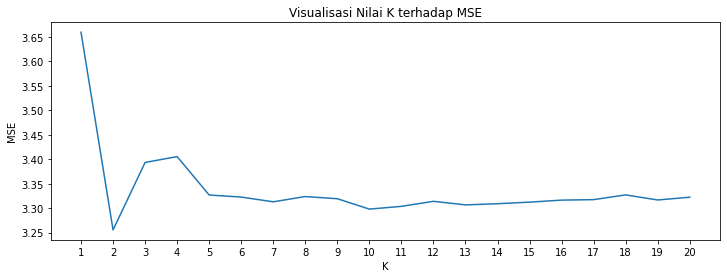

In [44]:
pd.DataFrame(list_mse, index=range(1, 21)).plot(
    xlabel="K",
    ylabel="MSE",
    legend=False,
    xticks=range(1,21), 
    figsize=(12,4),
    title='Visualisasi Nilai K terhadap MSE')

In [45]:
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'], 
                      columns=['KNN', 'RandomForest'])

In [48]:
KNN = MultiOutputRegressor(KNeighborsClassifier(n_neighbors=2)).fit(X_train, y_train)
df_models.loc['Train MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_train),
    y_true=y_train)
df_models.loc['Test MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_test),
    y_true=y_test)

In [49]:
RF = MultiOutputRegressor(RandomForestClassifier()).fit(X_train,y_train)
df_models.loc['Train MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_train),
    y_true=y_train)
df_models.loc['Test MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_test),
    y_true=y_test)

In [50]:
df_models

,KNN,RandomForest
Train MSE,1.911107,0.513059
Test MSE,3.255506,3.32484


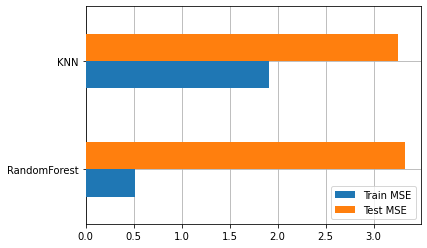

In [51]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
     

Lakukan Predict dengan full data X dan Y setelah diuji data train dan test terlihat bahwa algrotima Random Forest lebih baik dibandingkan dengan KNN

In [52]:
RF = MultiOutputRegressor(RandomForestClassifier()).fit(X,Y)

In [53]:
prd=RF.predict(X)
prd

array([[2., 1.],
       [1., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [6., 0.]])

In [54]:
score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(159.0, 0.5, 'Predicted')

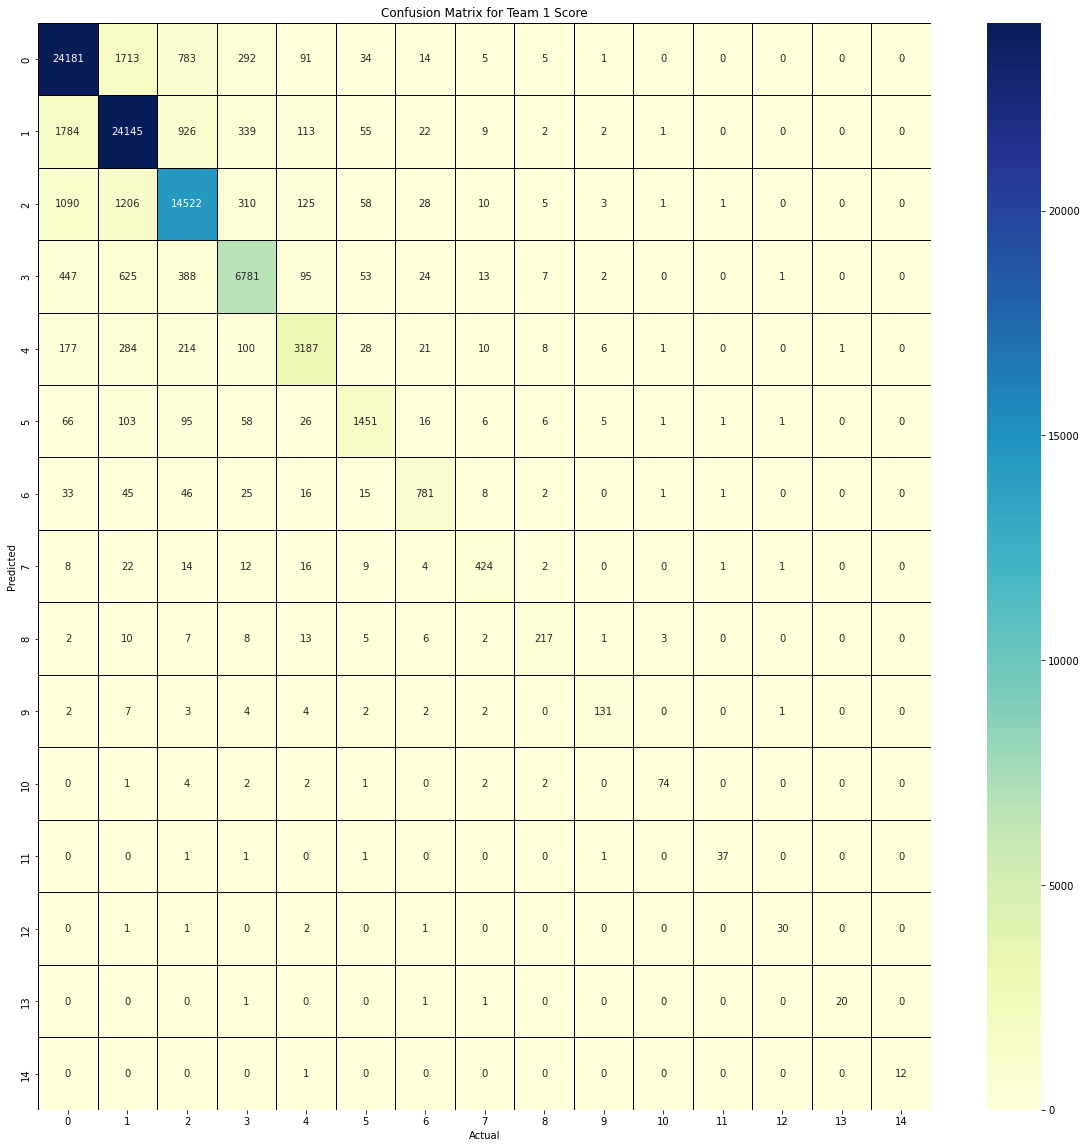

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [56]:
from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)


              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     27119
         1.0       0.86      0.88      0.87     27398
         2.0       0.85      0.84      0.85     17359
         3.0       0.85      0.80      0.83      8436
         4.0       0.86      0.79      0.82      4037
         5.0       0.85      0.79      0.82      1835
         6.0       0.85      0.80      0.83       973
         7.0       0.86      0.83      0.84       513
         8.0       0.85      0.79      0.82       274
         9.0       0.86      0.83      0.85       158
        10.0       0.90      0.84      0.87        88
        11.0       0.90      0.90      0.90        41
        12.0       0.88      0.86      0.87        35
        13.0       0.95      0.87      0.91        23
        14.0       1.00      0.92      0.96        13

    accuracy                           0.86     88302
   macro avg       0.88      0.84      0.86     88302
weighted avg       0.86   

Text(159.0, 0.5, 'Predicted')

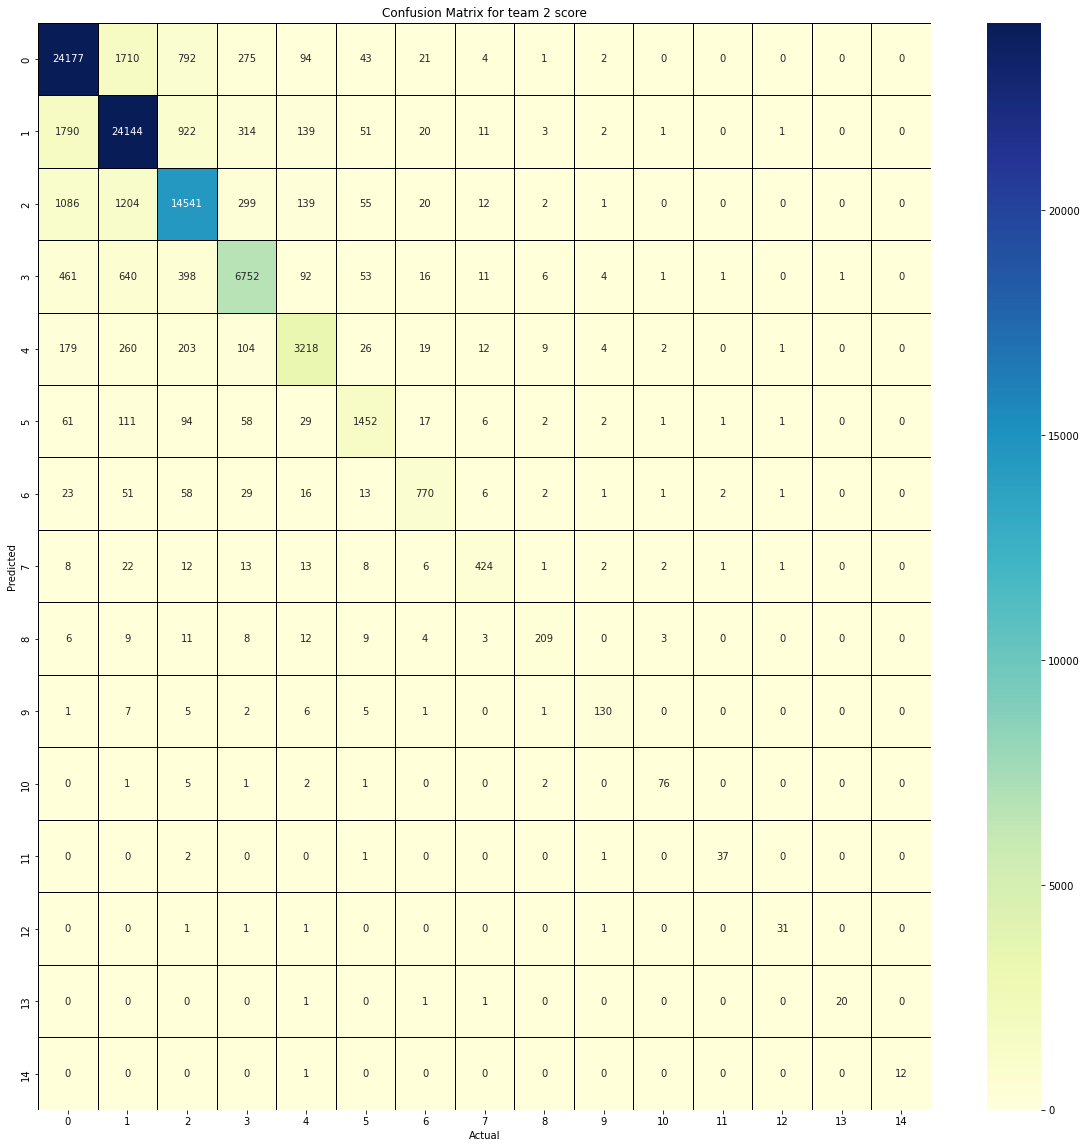

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [59]:
report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     27119
         1.0       0.86      0.88      0.87     27398
         2.0       0.85      0.84      0.85     17359
         3.0       0.86      0.80      0.83      8436
         4.0       0.86      0.80      0.83      4037
         5.0       0.85      0.79      0.82      1835
         6.0       0.86      0.79      0.82       973
         7.0       0.87      0.83      0.85       513
         8.0       0.88      0.76      0.82       274
         9.0       0.87      0.82      0.84       158
        10.0       0.87      0.86      0.87        88
        11.0       0.88      0.90      0.89        41
        12.0       0.86      0.89      0.87        35
        13.0       0.95      0.87      0.91        23
        14.0       1.00      0.92      0.96        13

    accuracy                           0.86     88302
   macro avg       0.88      0.84      0.86     88302
weighted avg       0.86   

In [60]:
def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [82]:
match_played=2022
team_1="United States"
team_2="Netherlands"
stadium="Qatar"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} -{team_1_num}")
print(f"Team 02 is {team_2} -{team_2_num}")
print(f"Played in  {stadium} -{stadium_num}")

Team 01 is United States -319
Team 02 is Netherlands -204
Played in  Qatar -242


In [83]:
#Sample Prediction Output

X_feature=np.array([[match_played,stadium_num,team_1_num,team_2_num]])
res=RF.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

United States vs Netherlands 
 Netherlands wins 🏆⚽🎯



C:\Users\FKR Computer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\FKR Computer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
